In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
# plt.show()
import warnings
warnings.filterwarnings('ignore')

from pandas_datareader import data as pdr
import yfinance as yf
from yahoo_fin import stock_info as si
from pandas import ExcelWriter
import requests
import datetime
#from datetime import datetime
import time

In [3]:
stock_df = pd.read_csv('2020-02-21', index_col='date')
stock_df.tail()

,A,AA,AACG,AAIC,AAL,AAMC,AAME,AAOI,AAON,AAP,...,ZS,ZSAN,ZTO,ZTS,ZUMZ,ZUO,ZVO,ZYME,ZYNE,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
2021-02-12,127.980003,21.660000,5.72,3.89,17.270000,26.360001,5.71,12.25,79.209999,152.809998,...,226.479996,1.63,38.480000,166.710007,46.869999,16.799999,6.58,41.000000,5.635,19.450001
2021-02-16,127.949997,22.430000,5.90,4.06,17.820000,25.000000,5.38,12.83,76.809998,155.509995,...,223.630005,1.67,37.419998,166.320007,46.490002,16.680000,6.36,41.790001,5.810,18.740000
2021-02-17,130.119995,21.930000,6.02,3.99,17.990000,24.469999,5.53,12.36,75.529999,161.820007,...,224.830002,1.52,36.910000,168.899994,45.750000,16.469999,5.99,40.990002,5.610,17.990000
2021-02-18,127.680000,21.120001,5.75,3.94,17.709999,24.959999,5.24,11.94,75.489998,167.550003,...,223.380005,1.49,36.939999,167.949997,45.240002,16.540001,5.94,41.020000,5.740,17.309999
2021-02-19,126.870003,23.129999,5.66,3.99,18.680000,24.600000,4.64,12.30,77.000000,165.979996,...,226.029999,1.49,36.930000,160.000000,46.040001,16.830000,6.05,41.139999,5.420,17.870001


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2020-02-21 to 2021-02-19
Columns: 4642 entries, A to ZYXI
dtypes: float64(4642)
memory usage: 8.9+ MB


In [ ]:
np.random.seed(1000)
stock_df.sample(2)

In [ ]:
stock_df.sample(frac= 0.3)

In [4]:
if stock_df.isnull().values.any():
    print(stock_df.shape)
    stock_df.dropna(axis=1, how='any', inplace=True)
    print(stock_df.shape)    

(252, 4642)
(252, 4633)


In [5]:
from sklearn.cluster import KMeans

In [ ]:
stock_df[stock_df]

In [7]:
# to select stocks with an average price less than 5$ in the last 252 dd
penny = stock_df[stock_df.columns[stock_df.mean(axis=0)<0.5]]

.median()<br>
.mean()<br>
.min()<br>
.max()<br>
.std()<br>
.skew()<br>
.kurt()<br>
.mode()<br>

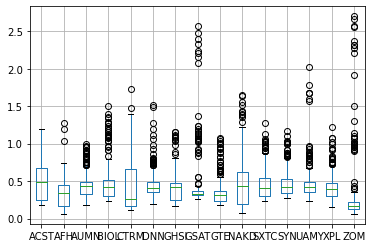

In [8]:
penny.boxplot()

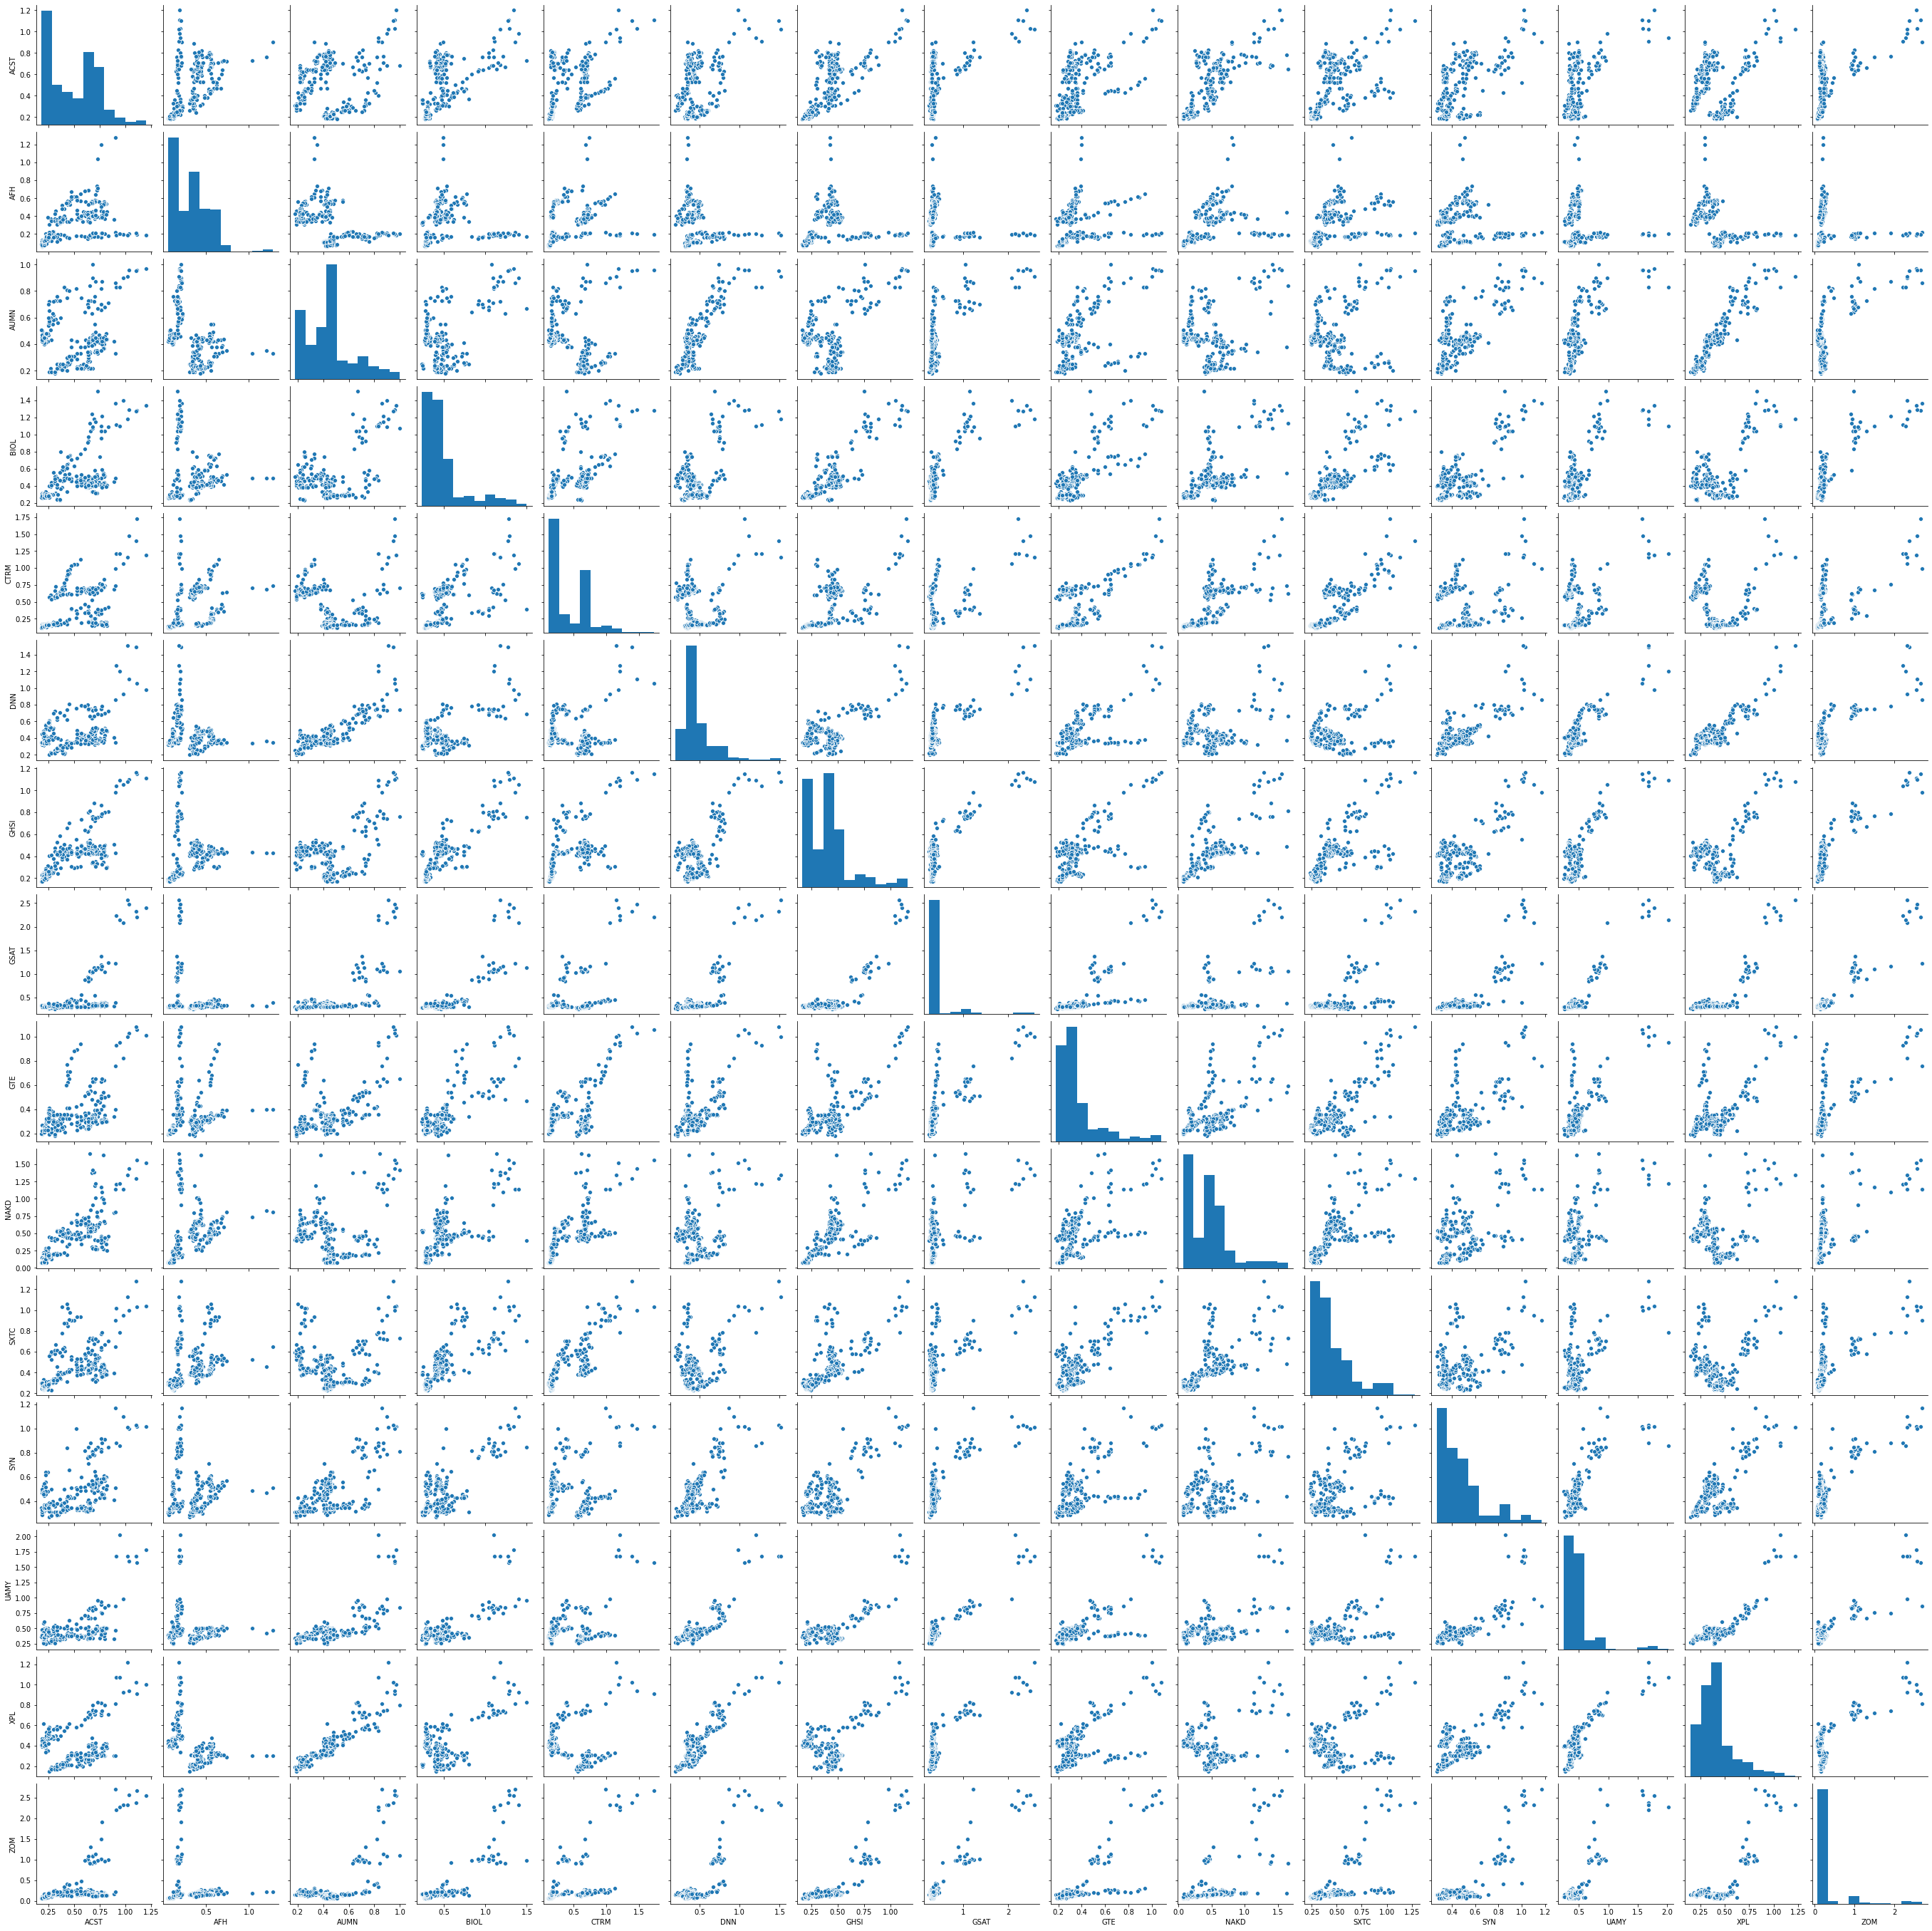

In [9]:
sns.pairplot(penny)

In [11]:
penny[penny.columns[penny.max()>20]]

""
date
2020-02-21
2020-02-24
2020-02-25
2020-02-26
2020-02-27
...
2021-02-12
2021-02-16
2021-02-17


In [12]:
# Normalization of our df
penny_norm = (penny - penny.min())/(penny.max() - penny.min())
penny_norm

,ACST,AFH,AUMN,BIOL,CTRM,DNN,GHSI,GSAT,GTE,NAKD,SXTC,SYN,UAMY,XPL,ZOM
date,,,,,,,,,,,,,,,
2020-02-21,0.372549,0.482759,0.182927,0.425197,0.627792,0.137405,0.138973,0.086580,0.844444,0.278024,0.673664,0.244444,0.084270,0.168224,0.092290
2020-02-24,0.343137,0.449918,0.182927,0.385827,0.578164,0.129771,0.132931,0.073593,0.788889,0.284421,0.673664,0.211111,0.078652,0.140187,0.080896
2020-02-25,0.313725,0.458128,0.158537,0.314961,0.582506,0.114504,0.128902,0.077922,0.777778,0.263268,0.636450,0.177778,0.089888,0.149533,0.069502
2020-02-26,0.284314,0.433498,0.158537,0.377953,0.564516,0.114504,0.138973,0.090909,0.711111,0.264155,0.637405,0.177778,0.101124,0.168224,0.051652
2020-02-27,0.254902,0.384236,0.109756,0.338583,0.509926,0.099237,0.305136,0.069264,0.588889,0.242369,0.751908,0.177778,0.106742,0.140187,0.069502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,0.833333,0.115435,0.951219,0.834646,0.838710,0.694657,0.939577,0.961039,0.944444,0.867004,0.730916,0.811111,0.758427,0.738318,0.950627
2021-02-16,0.901961,0.120443,0.939024,0.818898,0.795285,0.984733,1.000000,0.896104,1.000000,0.772008,1.000000,0.844444,0.808989,0.813084,0.874668
2021-02-17,0.823529,0.100985,0.890244,0.748031,0.646402,1.000000,0.919436,1.000000,0.911111,0.810006,0.856870,0.822222,0.808989,1.000000,0.855678


In [13]:
from sklearn import preprocessing

In [14]:
# standardization
preprocessing.scale(penny)

array([[ 0.28413872,  1.64164847, -0.66027821, ..., -0.36435145,
        -0.46069902, -0.0123604 ],
       [ 0.1574077 ,  1.44039254, -0.66027821, ..., -0.40463066,
        -0.62613631, -0.0740808 ],
       [ 0.03067693,  1.49070652, -0.76899517, ..., -0.32407212,
        -0.5709906 , -0.1358012 ],
       ...,
       [ 2.2273456 , -0.69795383,  2.49251196, ...,  4.83167167,
         4.44727403,  4.12290592],
       [ 1.76266586, -0.67782822,  2.05764413, ...,  4.83167167,
         3.62008771,  3.89659802],
       [ 1.88939663, -0.61694824,  2.05764413, ...,  6.20116631,
         3.62008771,  4.04061214]])

In [15]:
# possiamo procedere con lo scaling tramite scikit-learn:
df_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_scaled = df_scaler.fit_transform(penny)
df_scaled

array([[0.372549  , 0.48275861, 0.18292684, ..., 0.08426966, 0.1682243 ,
        0.09229016],
       [0.34313721, 0.44991792, 0.18292684, ..., 0.07865169, 0.14018692,
        0.08089631],
       [0.31372547, 0.45812809, 0.15853658, ..., 0.08988765, 0.1495327 ,
        0.06950247],
       ...,
       [0.82352935, 0.10098522, 0.89024393, ..., 0.80898874, 1.        ,
        0.85567789],
       [0.71568626, 0.1042693 , 0.7926829 , ..., 0.80898874, 0.85981311,
        0.81390049],
       [0.745098  , 0.11420362, 0.7926829 , ..., 1.        , 0.85981311,
        0.84048611]])

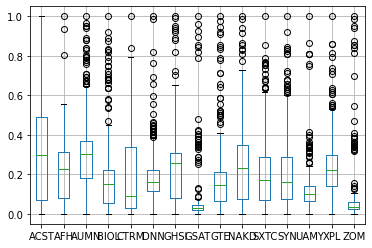

In [16]:
penny_norm.boxplot(return_type = 'axes')

{'whiskers': [<matplotlib.lines.Line2D at 0x2531b50eca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2531b5203a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2531b50e940>,
 'medians': [<matplotlib.lines.Line2D at 0x2531b520a00>,
 'fliers': [<matplotlib.lines.Line2D at 0x2531b520cd0>,
 'means': []}

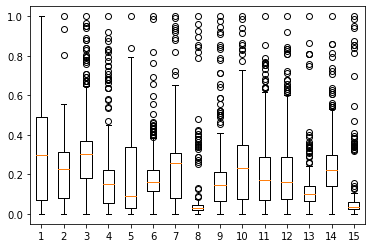

In [17]:
plt.boxplot(df_scaled)

In [18]:
stock_df.dtypes

A       float64
AA      float64
AACG    float64
AAIC    float64
AAL     float64
         ...   
ZUO     float64
ZVO     float64
ZYME    float64
ZYNE    float64
ZYXI    float64
Length: 4633, dtype: object

In [19]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2020-02-21 to 2021-02-19
Columns: 4633 entries, A to ZYXI
dtypes: float64(4633)
memory usage: 8.9+ MB


In [20]:
kmeans = KMeans(n_clusters = 10)

In [22]:
kmeans.fit(penny)

KMeans(n_clusters=10)

In [23]:
kmeans.labels_

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3])

Text(0, 0.5, 'Var')

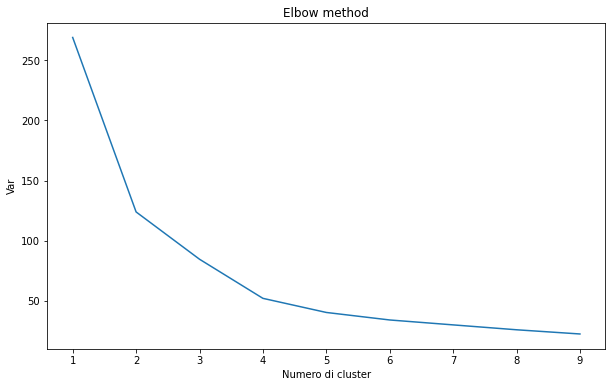

In [25]:
cl1 = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(penny)
    cl1.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), cl1)
plt.title('Elbow method')
plt.xlabel('Numero di cluster')
plt.ylabel('Var')

In [ ]:
kmeans.labels_